# Flight price prediction

In [2]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn



%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

pd. set_option('display.max_columns', 300)  
pd. set_option('display.max_rows', 300) 

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [5]:
train_data = pd.read_excel('Data_Train.xlsx')


In [6]:
pd.set_option("display.max_columns",None)


In [7]:
train_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [11]:
train_data.shape


(10683, 11)

In [12]:
train_data.dropna(inplace=True)


In [13]:
train_data.shape


(10682, 11)

# EDA


In [14]:
train_data["Journey_DAY"]=pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.day
train_data["Journey_MONTH"]=pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.month
train_data.drop("Date_of_Journey",axis=1,inplace=True)


In [15]:
train_data["Dep_hour"]=pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["Dep_minutes"]=pd.to_datetime(train_data["Dep_Time"]).dt.minute
train_data.drop("Dep_Time",axis=1,inplace=True)


In [16]:
train_data["Arrival_hour"]=pd.to_datetime(train_data["Arrival_Time"]).dt.hour
train_data["Arrival_minutes"]=pd.to_datetime(train_data["Arrival_Time"]).dt.minute
train_data.drop("Arrival_Time",axis=1,inplace=True)


In [17]:
train_data.head(1)


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10


In [18]:
train_data["Duration"].reset_index()


,index,Duration
0,0,2h 50m
1,1,7h 25m
2,2,19h
3,3,5h 25m
4,4,4h 45m
...,...,...
10677,10678,2h 30m
10678,10679,2h 35m
10679,10680,3h
10680,10681,2h 40m


In [19]:
"19h"+" 0m"


'19h 0m'

In [20]:
duration=list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip() + " 0m"
        else:
            duration[i]=  "0h "  + duration[i]
            
duration_hours=[]
duration_minutes=[]

for  i in range(len(duration)):
    duration_hours.append(int(duration[i].split("h")[0]))
    duration_minutes.append(int(duration[i].split("m")[0].split()[-1]))
    

train_data["duration_hours"]=duration_hours
train_data["duration_minutes"]=duration_minutes

In [21]:
train_data.head(1)


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [22]:
train_data.drop("Duration",axis=1,inplace=True)


In [23]:
train_data.head(1)


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [24]:
# 1 hour=60 minutes
# 1 minutes=1/60 hour
(50/60)+18

18.833333333333332

In [25]:
train_data["total_travel_time"]=np.round((train_data["duration_minutes"]/60)+ train_data["duration_hours"],2)


In [26]:
train_data.head()


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hours,duration_minutes,total_travel_time
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,2.83
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25,7.42
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0,19.00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25,5.42
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45,4.75


handle categorical featurees
1- Nominal Data= use onehot encoding because every value is eqal
2- Ordinal Data= use Lable encoding for labled data( when there is an order between values). you
use normal order encoding(1,2,3,4 by default order) or can use target lable encoding(give values
by your own choice
in airline column foreign flights can have more price if there is any but there is not so here use
ohe not lable encoding

In [27]:
train_data["Airline"].value_counts()


Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:ylabel='Airline'>

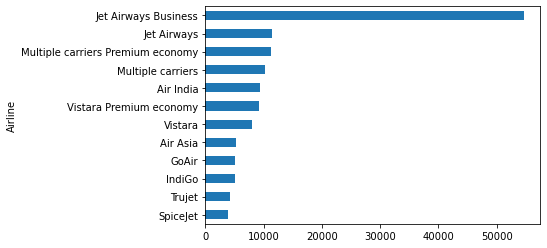

In [28]:
train_data.groupby('Airline')['Price'].median().sort_values().plot.barh()


<AxesSubplot:ylabel='Source'>

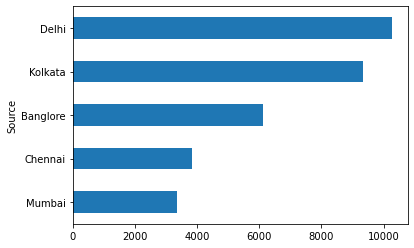

In [29]:
train_data.groupby('Source')['Price'].median().sort_values(ascending=True).plot.barh()


In [30]:
train_data.groupby('Destination')['Price'].median().sort_values(ascending=True).index


Index(['Hyderabad', 'Kolkata', 'Delhi', 'Banglore', 'Cochin', 'New Delhi'], dtype='object', name='Destination')

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

<AxesSubplot:ylabel='Destination'>

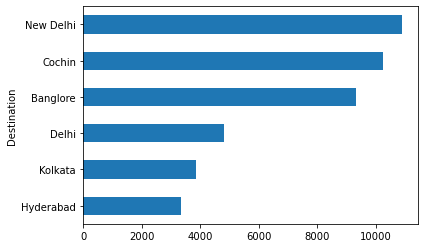

In [32]:
train_data.groupby('Destination')['Price'].median().sort_values().plot.barh()


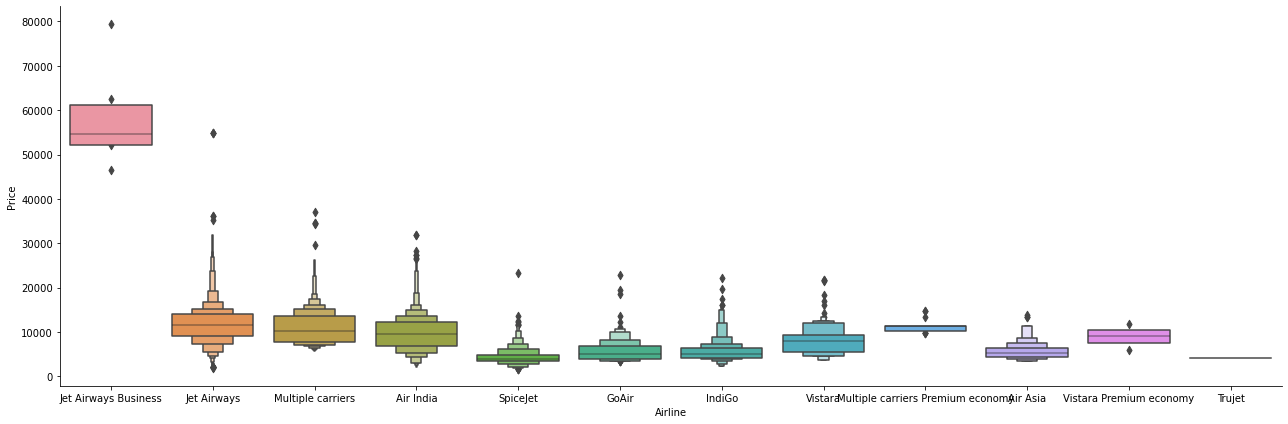

In [33]:
sns.catplot(y="Price",x="Airline",data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)


In [34]:
Airline=train_data[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [35]:
train_data["Source"].value_counts()


Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

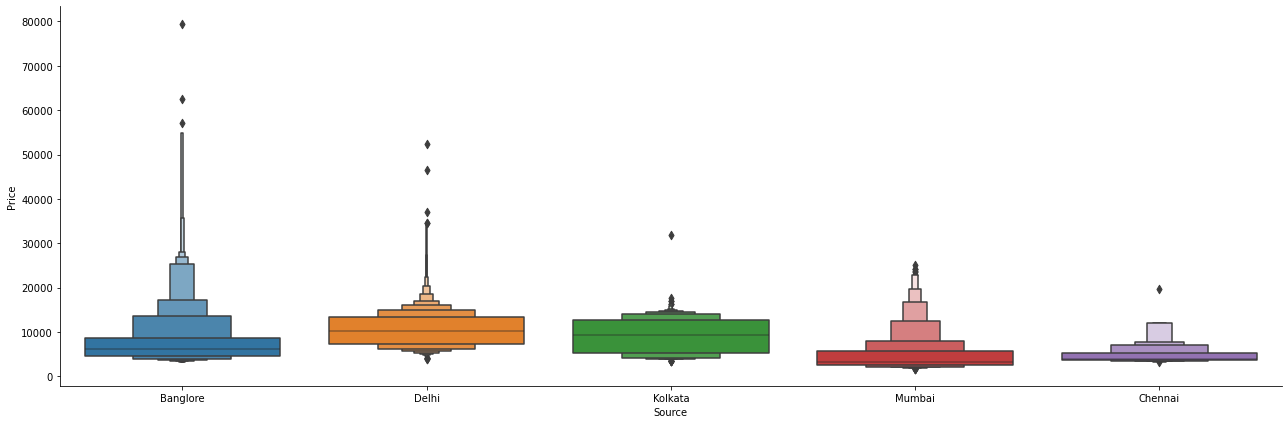

In [36]:
sns.catplot(y="Price",x="Source",data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)


In [37]:
sorce=train_data[["Source"]]
sorce=pd.get_dummies(sorce,drop_first=True)
sorce.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


# removing outliers


In [38]:
train_data["Destination"].value_counts()


Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

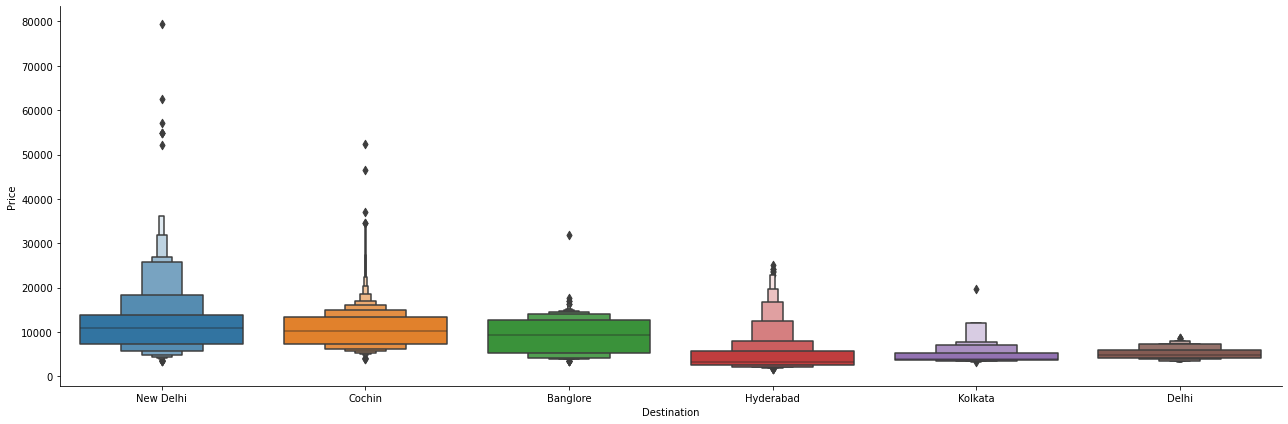

In [39]:
sns.catplot(y="Price",x="Destination",data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)


In [40]:
destination=train_data[["Source"]]
destination=pd.get_dummies(destination,drop_first=True)
destination.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [41]:
train_data["Total_Stops"].value_counts().index


Index(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], dtype='object')

In [42]:
train_data["Additional_Info"].value_counts()


No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [43]:
train_data.drop(["Route","Additional_Info"],axis=1,inplace=True)


# Handling Total Stops

<AxesSubplot:ylabel='Total_Stops'>

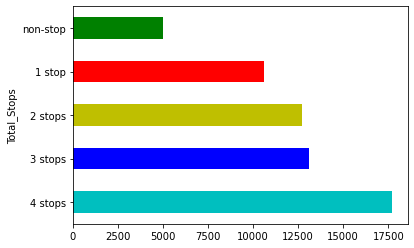

In [44]:
train_data.groupby("Total_Stops")["Price"].mean().sort_values(ascending=False).plot.barh(color=["c","b","y","r","g"])


In [45]:
train_data["Total_Stops"].replace({'1 stop':1, 'non-stop':0, '2 stops':2, '3 stops':3, '4 stops':4},inplace=True)


In [46]:
train_data['Total_Stops'].value_counts()


1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [47]:
data_train=pd.concat([train_data,Airline,sorce,destination],axis=1)


In [48]:
data_train.drop(['Airline', 'Source', 'Destination'],axis=1,inplace=True)


In [49]:
data_train.shape


(10682, 30)

In [51]:
test_data=pd.read_excel("Test_set.xlsx")


In [52]:
test_data.shape


(2671, 10)

In [53]:
test_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# Steps for test data

In [54]:
test_data["Journey_DAY"]=pd.to_datetime(test_data["Date_of_Journey"],format="%d/%m/%Y").dt.day


In [55]:
test_data["Journey_MONTH"]=pd.to_datetime(test_data["Date_of_Journey"],format="%d/%m/%Y").dt.month


In [56]:
test_data.drop("Date_of_Journey",axis=1,inplace=True)


In [57]:
test_data["Dep_hour"]=pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_minutes"]=pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop("Dep_Time",axis=1,inplace=True)


In [58]:
test_data["Arrival_hour"]=pd.to_datetime(test_data["Arrival_Time"]).dt.hour
test_data["Arrival_minutes"]=pd.to_datetime(test_data["Arrival_Time"]).dt.minute
test_data.drop("Arrival_Time",axis=1,inplace=True)


In [59]:
duration1=list(test_data["Duration"])


In [60]:
len(duration1)


2671

In [61]:
for i in range(len(duration1)):
    if len(duration1[i].split())!=2:
        if "h" in duration1[i]:
            duration1[i]=duration1[i].strip() + " 0m"
        else:
            duration1[i]=  "0h "  + duration1[i]
            
duration_hours=[]
duration_minutes=[]

for  i in range(len(duration1)):
    duration_hours.append(int(duration[i].split("h")[0]))
    duration_minutes.append(int(duration[i].split("m")[0].split()[-1]))
    

test_data["duration_hours"]=duration_hours
test_data["duration_minutes"]=duration_minutes

In [62]:
test_data.head()


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hours,duration_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25,2,50
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20,7,25
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0,5,25
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45,4,45


In [63]:
Airline=test_data[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

sorce=test_data[["Source"]]
sorce=pd.get_dummies(sorce,drop_first=True)
sorce.head()


destination=test_data[["Source"]]
destination=pd.get_dummies(destination,drop_first=True)
destination.head()

test_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Journey_DAY', 'Journey_MONTH', 'Dep_hour',
       'Dep_minutes', 'Arrival_hour', 'Arrival_minutes', 'duration_hours',
       'duration_minutes'],
      dtype='object')

In [64]:
test_data["Total_Stops"].replace({'1 stop':1, 'non-stop':0, '2 stops':2, '3 stops':3, '4 stops':4},inplace=True)


In [65]:
data_test=pd.concat([test_data,Airline,sorce,destination],axis=1)


In [66]:
data_test.shape,data_train.shape


((2671, 33), (10682, 30))

In [67]:
data_train.total_travel_time.head(2)


0    2.83
1    7.42
Name: total_travel_time, dtype: float64

In [68]:
data_train.drop("total_travel_time",axis=1,inplace=True)


In [69]:
data_test.drop(['Airline', 'Source', 'Destination','Route','Additional_Info','Duration'],axis=1,inplace=True)


In [70]:
data_test.shape


(2671, 27)

In [71]:
data_train.shape ,data_test.shape


((10682, 29), (2671, 27))

In [72]:
x=data_train.drop(["Airline_Trujet","Price"],axis=1)


In [73]:
x.head(1)


,Total_Stops,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
y=data_train["Price"]


In [75]:
y=np.array(y)


<AxesSubplot:>

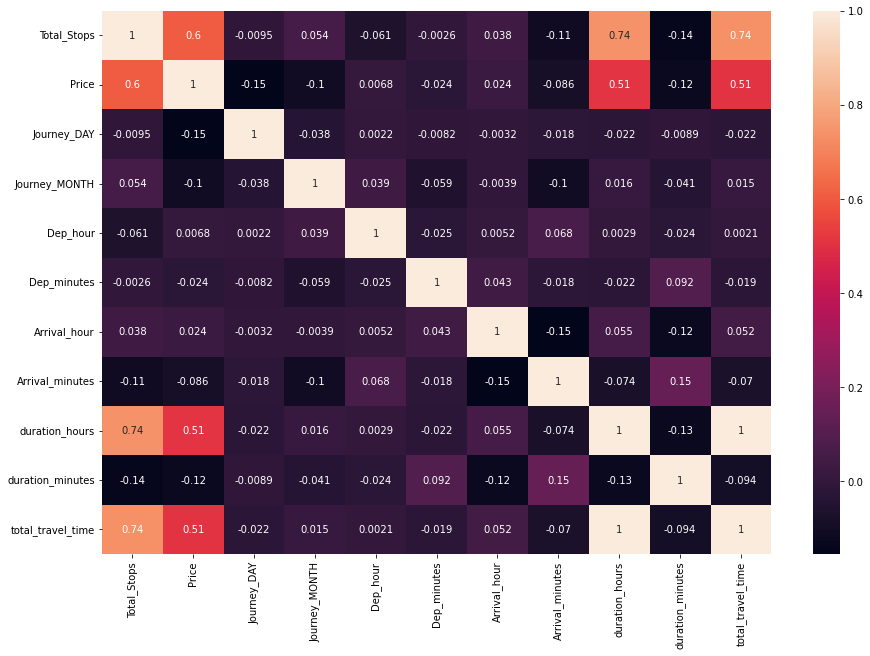

In [77]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(),annot=True)

# machine learning

In [78]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

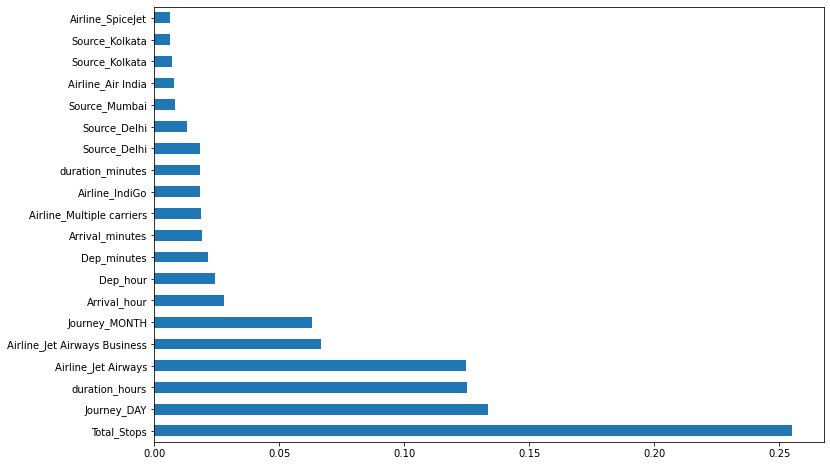

In [79]:
plt.figure(figsize=(12,8))
feature_imp=pd.Series(selection.feature_importances_,index=x.columns)
feature_imp.nlargest(20).plot.barh()
plt.show()

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [81]:
from sklearn.ensemble import RandomForestRegressor
rgf_rf=RandomForestRegressor()
rgf_rf.fit(X_train,y_train)

RandomForestRegressor()

In [82]:
y_pred=rgf_rf.predict(X_test)


In [83]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score


In [84]:
cross_val_score(rgf_rf,x,y)


NameError: name 'cross_val_score' is not defined

In [85]:
rgf_rf.score(X_train,y_train)


0.9530003818985427

In [86]:
rgf_rf.score(X_test,y_test)


0.7922340392709423

<AxesSubplot:ylabel='Density'>

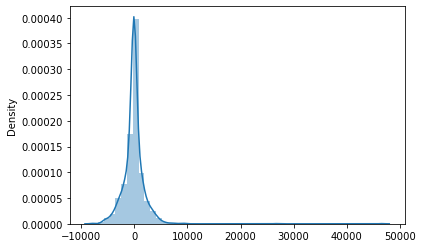

In [87]:
sns.distplot(y_test-y_pred)


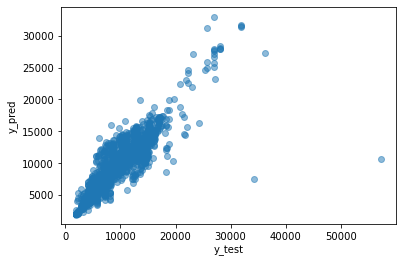

In [88]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [89]:
mean_absolute_error(y_test,y_pred)


1183.1107245499652

In [90]:
np.sqrt(mean_squared_error(y_test,y_pred))


2116.5682950199193

In [91]:
r2_score(y_test,y_pred)


0.7922340392709423

# hyperparametertuning 


In [92]:
RandomForestRegressor()


RandomForestRegressor()

In [93]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=["auto","sqrt"]
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [94]:
random_grid={
    "n_estimators":n_estimators,
     "max_features":max_features,
     "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf
}

In [95]:
from sklearn.model_selection import cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import train_test_split

In [96]:
cross_val_score(rgf_rf,x,y)


array([0.81844625, 0.81231277, 0.84086724, 0.82099227, 0.76076083])

In [97]:
rf_random=RandomizedSearchCV(estimator=rgf_rf,param_distributions=random_grid,scoring="neg_mean_squared_error",n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)


In [98]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [99]:
rf_random.best_estimator_


RandomForestRegressor(max_depth=20, max_features='auto', min_samples_split=15,
                      n_estimators=700)

In [100]:
rf_random.best_params_


{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [101]:
prediction=rf_random.predict(X_test)


In [102]:
r2_score(y_test,prediction)


0.8054113200690827

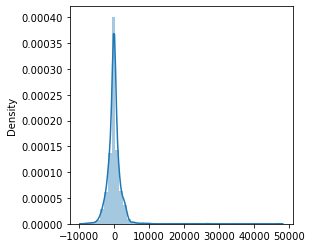

In [103]:
plt.figure(figsize=(4,4))
sns.distplot(y_test-prediction)
plt.show()

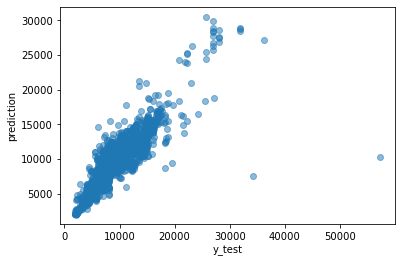

In [104]:
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("prediction")
plt.show()

In [105]:
mean_absolute_error(y_test,prediction)


1167.0730199221596

# Saving the model 


In [106]:
import pickle
file=open('Flight_rf.pkl','wb')
pickle.dump(rf_random,file)

In [107]:
model=open("Flight_rf.pkl",'rb')
forest=pickle.load(model)

In [108]:
y_prediction=forest.predict(X_test)


In [109]:
from sklearn.metrics import r2_score


In [110]:
r2_score(y_test,y_prediction)


0.8054113200690827

hence we got the aaccuracy of 80.5 